In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout

In [2]:
df = pd.read_csv('FIC.Full CSV.csv')
df.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34


In [3]:
label_encoder = preprocessing.LabelEncoder()
col = df.columns
df_new = df.copy()
for c in col:
    df_new[c] = label_encoder.fit_transform(df_new[c])
df_new.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,6,2,0,0,0,0,0,0,1,1,...,24,1,0,2,1,1,4,0,0,21
1,10,3,0,1,0,0,0,0,1,1,...,10,1,0,2,1,1,4,0,0,10
2,14,3,0,0,0,1,1,0,1,1,...,27,1,0,0,1,1,4,0,0,5
3,14,3,0,0,0,1,1,0,1,1,...,16,1,1,2,2,1,4,0,0,18
4,15,3,0,0,0,1,0,0,1,1,...,30,2,2,2,2,1,4,0,0,15


In [4]:
y = df_new['Mortality']
X = df_new.drop(['Mortality'] , axis=1)
selection = ExtraTreesRegressor()
selection.fit(X,y)
for i in range(len(selection.feature_importances_)):
    print(f'column-{(df_new.columns[i]).strip()} ,importance = {selection.feature_importances_[i]} ')

column-Age ,importance = 0.061736729585993515 
column-Age.Group ,importance = 0.13505624481061587 
column-Gender ,importance = 0.04152075689783223 
column-Locality ,importance = 0.012532131134707249 
column-Marital status ,importance = 0.0 
column-Life.Style ,importance = 0.008874717006825364 
column-Sleep ,importance = 0.002453285135196252 
column-Category ,importance = 0.0018548765858960386 
column-Depression ,importance = 0.0011318974841418754 
column-Hyperlipi ,importance = 0.00012388710826210828 
column-Smoking ,importance = 0.0010308155872118616 
column-Family.History ,importance = 0.0024938516869314263 
column-F.History ,importance = 0.0036239450667214877 
column-Diabetes ,importance = 0.10234611252772517 
column-HTN ,importance = 0.0033887509977664244 
column-Allergies ,importance = 0.0019240445435837177 
column-BP ,importance = 0.016738965067158253 
column-Thrombolysis ,importance = 0.0 
column-BGR ,importance = 0.008119711555524265 
column-B.Urea ,importance = 0.0092003945441

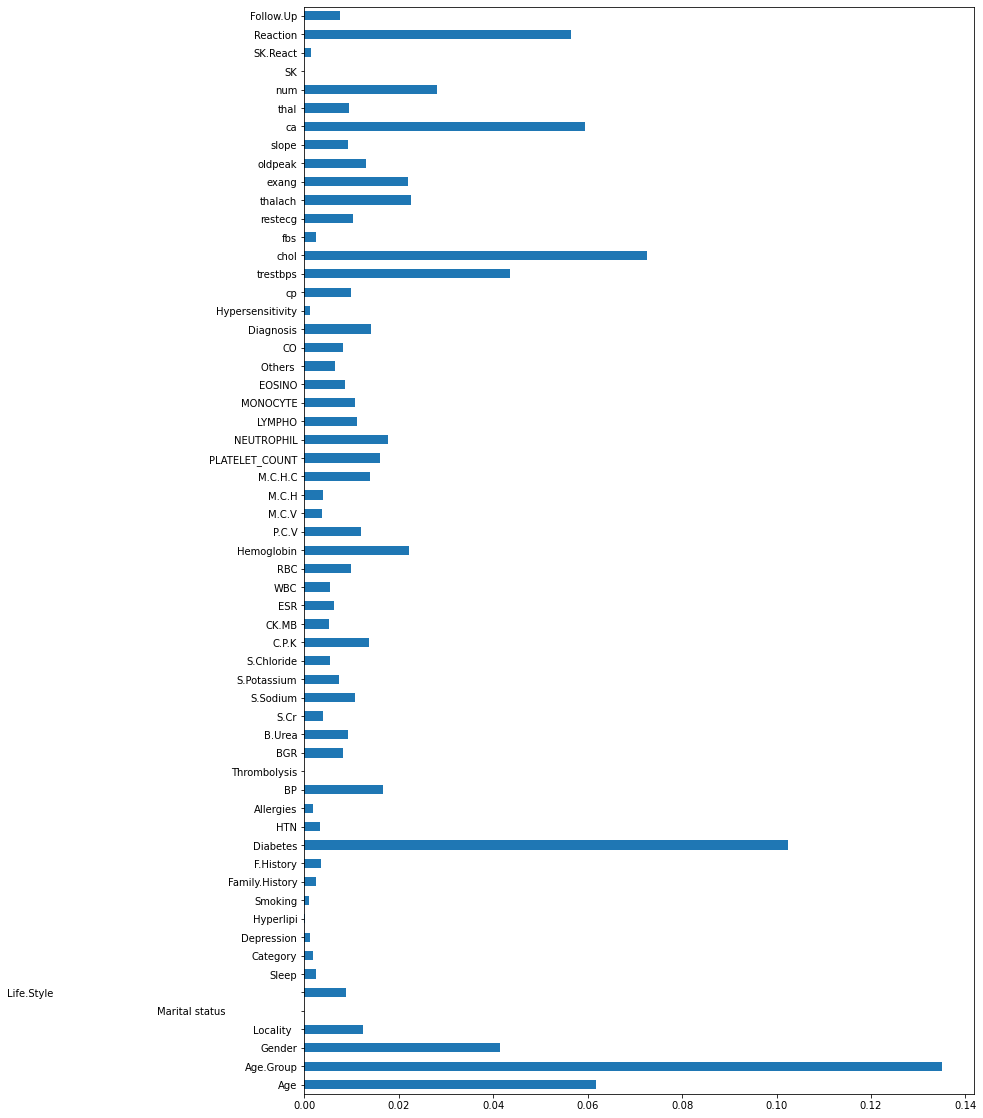

In [5]:
plt.figure(figsize = (12,20))
important_features = pd.Series(selection.feature_importances_, index=X.columns)
important_features.plot(kind='barh')
plt.show()

In [6]:
important_features = pd.Series(selection.feature_importances_, index=X.columns).nlargest(15).index
X = X[important_features]
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.1)

In [7]:
model = Sequential()
model.add(Dense(512, input_shape=(15,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [8]:
model.fit(X_train,y_train , epochs=80, batch_size=20)

Epoch 1/80
17/17 [==============================] - 1s 2ms/step - loss: 0.6470 - binary_accuracy: 0.7341
Epoch 2/80
17/17 [==============================] - 0s 2ms/step - loss: 0.4630 - binary_accuracy: 0.8006
Epoch 3/80
17/17 [==============================] - 0s 2ms/step - loss: 0.4648 - binary_accuracy: 0.7825
Epoch 4/80
17/17 [==============================] - 0s 2ms/step - loss: 0.4105 - binary_accuracy: 0.8248
Epoch 5/80
17/17 [==============================] - 0s 2ms/step - loss: 0.3231 - binary_accuracy: 0.8489
Epoch 6/80
17/17 [==============================] - 0s 2ms/step - loss: 0.3990 - binary_accuracy: 0.8127
Epoch 7/80
17/17 [==============================] - 0s 2ms/step - loss: 0.3290 - binary_accuracy: 0.8399
Epoch 8/80
17/17 [==============================] - 0s 2ms/step - loss: 0.3163 - binary_accuracy: 0.8610
Epoch 9/80
17/17 [==============================] - 0s 2ms/step - loss: 0.2596 - binary_accuracy: 0.8852
Epoch 10/80
17/17 [==============================] - 0s

17/17 [==============================] - 0s 2ms/step - loss: 4.7992e-05 - binary_accuracy: 1.0000
Epoch 77/80
17/17 [==============================] - 0s 2ms/step - loss: 4.5326e-05 - binary_accuracy: 1.0000
Epoch 78/80
17/17 [==============================] - 0s 2ms/step - loss: 4.4081e-05 - binary_accuracy: 1.0000
Epoch 79/80
17/17 [==============================] - 0s 2ms/step - loss: 4.2048e-05 - binary_accuracy: 1.0000
Epoch 80/80
17/17 [==============================] - 0s 2ms/step - loss: 4.1411e-05 - binary_accuracy: 1.0000


In [9]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2/2 [==============================] - 0s 3ms/step - loss: 0.6232 - binary_accuracy: 0.9459
Accuracy: 94.59
